In [43]:
import networkx as nx
import networkit as nit
import sys 
sys.path.append('..')
import graph_generators as gg
import matplotlib.pyplot as plt

In [2]:
ba_gen = nit.generators.BarabasiAlbertGenerator(10, 10 ** 3)
G = ba_gen.generate()

In [3]:
gen = nit.generators.LFRGenerator.fit(G, scale=2)
G2 = gen.generate()
print(G2.numberOfNodes())


2000


In [20]:
def avg_deg(G):
    return sum(dict(G.degree()).values()) / len(G)

In [23]:
N = 10 ** 4
G = nx.powerlaw_cluster_graph(N, 5, 0.35)
Gba = nx.barabasi_albert_graph(N, 5)
avg_deg(G), avg_deg(Gba)

(9.9906, 9.995)

In [ ]:
nx.average_clustering(G), nx.average_clustering(Gba)

In [ ]:
artist = gg.load_gemsec_fb('athletes')

In [ ]:
nx.average_clustering(artist)

In [4]:
gemsec_fbs = [gg.load_gemsec_fb(_) for _ in gg.GEMSEC_FB_ARGS]

In [5]:
[nx.average_clustering(_) for _ in gemsec_fbs]

[0.13811495287065234,
 0.27614853940273026,
 0.2392079390902055,
 0.41076781193737977,
 0.2953695976286596,
 0.3849658056153406,
 0.17931624101983312,
 0.3735464764081431]

In [16]:
gemsec_deezers = [gg.load_gemsec_deezer(_) for _ in gg.GEMSEC_DEEZER_ARGS]

In [15]:
gemsec_deezers[0].edges()

EdgeView([])

In [17]:
[nx.average_clustering(_) for _ in gemsec_deezers]

[0.09120797046991468, 0.13647174362435588, 0.11618233863493775]

In [9]:
arxivs = [gg.load_arxiv_collab(_) for _ in ['AstroPh', 'HepPh', 'GrQc', 'HepTh']]

In [11]:
[nx.average_clustering(_) for _ in arxivs]

[0.6305932411707943, 0.6114825236824339, 0.529635811052136, 0.4714390529669332]

In [21]:
[avg_deg(_) for _ in arxivs]

[21.10696782441935, 19.740339773484344, 5.530713468141931, 5.264351523742027]

In [48]:
G = nx.powerlaw_cluster_graph(N, 10, 0.25)
avg_deg(G), nx.average_clustering(G)

(19.9632, 0.05890792282903287)

In [31]:
import quarantines as Q

In [49]:
by_props = [] 
for _ in [_ /20 for _ in range(20)]:
    print(_)
    by_props.append(Q.quarantine_by_prop(G, 0.1, 0.1, 10 / N, [_], float('inf'), num_iter=3))

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


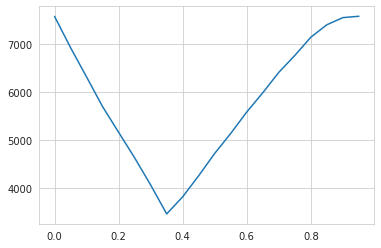

In [46]:
plt.plot(*zip(*[(i / 20, _.get_max_I()) for i, _ in enumerate(by_props)]))

In [63]:
WSG = gg.watts_strogatz_graph(None, N, 10, 0.05)

In [64]:
nx.average_clustering(WSG)

0.5718825530025616